# V-мера 
— среднее гармоническое однородности и полноты, то есть метрика,  объединяющая эти два показателя:


```
v = (1 + beta) * homogeneity * completeness
     / (beta * homogeneity + completeness)
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def generate():
  n_samples = 1500
  dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                                cluster_std=[1.4, 1.7],
                                random_state=42)
  X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
  transformation = [[1.2, -0.8], [-0.4, 1.7]]
  X_2 = np.dot(X_2, transformation)
  X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
  return X, y
X, y = generate()

<function matplotlib.pyplot.show>

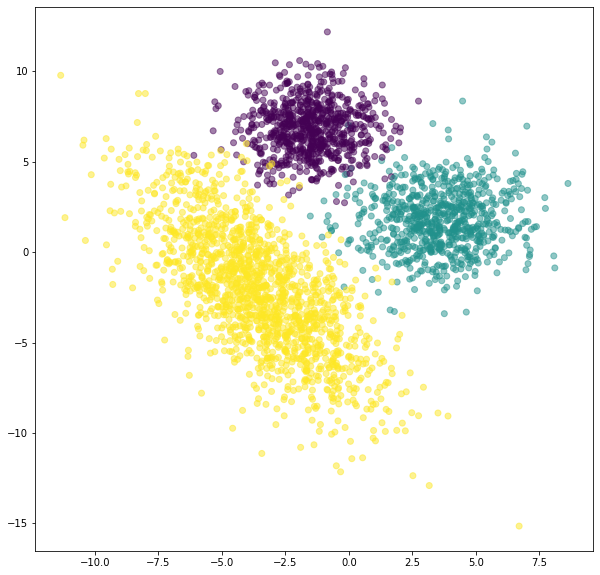

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.795592702456356

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте v-меру для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)
gm = GaussianMixture(n_components=3, random_state=42)
gm_pred = gm.fit_predict(X)
v_measure_score(labels_true=y, labels_pred=gm_pred)

0.9332760595996924

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи v-меры, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42
GaussianMixture — n_components=3, random_state=42
AgglomerativeClustering — n_clusters=3
DBSCAN — eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [5]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# list_models = [KMeans, GaussianMixture, AgglomerativeClustering]
kmeans=KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbs = DBSCAN(eps=0.9, min_samples=35)
clasters = {'kmeans': kmeans, 'gm': gm, 'ac': ac, 'dbs': dbs}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))

kmeans 0.79
gm 0.93
ac 0.91
dbs 0.0


Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

* n_clusters=3, init='k-means++', n_init=1, random_state=42
* n_clusters=3, init='random', n_init=1, random_state=42
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [6]:
kmeans_1 = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans_2 = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
clasters = {'kmeans_1': kmeans_1, 'kmeans_2': kmeans_2}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))

kmeans_1 0.79
kmeans_2 0.79


Теперь сравним k-means с ещё одной модификацией — K-means mini batch. Воспользоваться реализацией K-means mini batch в библиотеке sklearn можно следующим образом:

In [7]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=
3, random_state=
42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_

Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. Обучите на исходном датасете две модели:

* k-means с параметрами n_clusters=3, n_init=1, random_state=42
* MiniBatchKMeans с параметрами n_clusters=3, n_init=1, random_state=42

В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых

In [9]:
X, y = generate()

kmeans_mini_batch_1 = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch_2 = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)

clasters = {'kmeans_mini_batch_1': kmeans_mini_batch_1, 'kmeans_mini_batch_2': kmeans_mini_batch_2}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))

kmeans_mini_batch_1 0.78
kmeans_mini_batch_2 0.78


In [10]:
X, y = generate()

std = StandardScaler()
X = std.fit_transform(X)

kmeans_mini_batch_1 = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch_2 = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)

clasters = {'kmeans_mini_batch_1': kmeans_mini_batch_1, 'kmeans_mini_batch_2': kmeans_mini_batch_2}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))

kmeans_mini_batch_1 0.76
kmeans_mini_batch_2 0.75


Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage.

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [11]:
linkage = ["ward", "complete", "average", "single"]
for lkg in linkage:
  ac = AgglomerativeClustering(n_clusters=3, linkage=lkg)
  cls_pred = ac.fit_predict(X)
  print(round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))  

0.91
0.58
0.68
0.0


Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две модели AgglomerativeClustering:

* с параметром n_clusters=3
* с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета

Построить матрицу смежности можно с помощью кода:
```
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)
```



В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [12]:
X, y = generate()
X = std.fit_transform(X)
from sklearn.neighbors import kneighbors_graph
 
connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [13]:
ag_sample = AgglomerativeClustering(n_clusters=3)
ag_conactivity = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

In [14]:
clasters = {'ag_sample': ag_sample, 'ag_conactivity': ag_conactivity}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))

ag_sample 0.91
ag_conactivity 0.88


Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре eps или min_samples может изменить результат и качество кластеризации.

Обучите на исходном датасете две модели DBSCAN:

* с параметрами eps=0.9, min_samples=35
* с параметрами eps=0.8, min_samples=35

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [15]:
X, y = generate()
dbs_1 = DBSCAN(eps=0.9, min_samples=35)
dbs_2 = DBSCAN(eps=0.8, min_samples=35)
clasters = {'dbs_1': dbs_1, 'dbs_2': dbs_2}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, round(v_measure_score(labels_true=y, labels_pred=cls_pred), 2))

dbs_1 0.77
dbs_2 0.71


Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. Посмотрим на качество кластеризации без учёта таких объектов.

Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [16]:
import numpy as np

dbs = DBSCAN(eps=0.9, min_samples=35)
dbs_pred = dbs.fit_predict(X)
dbs_pred_ne = np.where(dbs_pred !=-1)

v_measure_score(labels_true=y[dbs_pred_ne], labels_pred=dbs_pred[dbs_pred_ne])

0.9667281300681958

В курсе мы рассмотрели два метода нормализации данных:

* MinMax нормализация — приведение данных к масштабу между 0 и 1.
* Стандартная нормализация — данные имеют среднее 0 и стандартное отклонение 1.

Проверим, влияет ли предобработка данных на результат кластеризации. Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

* на признаках исходного датасета,
* предварительно трансформируйте признаки при помощи стандартной нормализации.

Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [19]:
ac = AgglomerativeClustering(n_clusters=3)
X, y = generate()
ac_pred = ac.fit_predict(X)
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.703747024360433

In [21]:
X, y = generate()
X = std.fit_transform(X)
ac_pred = ac.fit_predict(X)
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.9079037199053294

Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

на признаках исходного датасета,
предварительно трансформируйте признаки при помощи MinMax нормализации.
Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
ac = AgglomerativeClustering(n_clusters=3)
X, y = generate()
X = min_max.fit_transform(X)
ac_pred = ac.fit_predict(X)
v_measure_score(labels_true=y, labels_pred=ac_pred)

0.8929241488344335